In [1]:
import pickle 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = 'genetic_trials_cv.p'
data = pickle.load(open(f,'rb'))
# data.trials

In [3]:
results = ['auc_score','average_precision_score','f1_score','loss','recall_score','precision_score']
vals = ['batch_size','droput_strength','learning_rate','n_filters','n_final_layer','n_layers']
index = range(len(data.trials))
df = pd.DataFrame(index=index, columns=results+vals)
df = df.dropna()

96


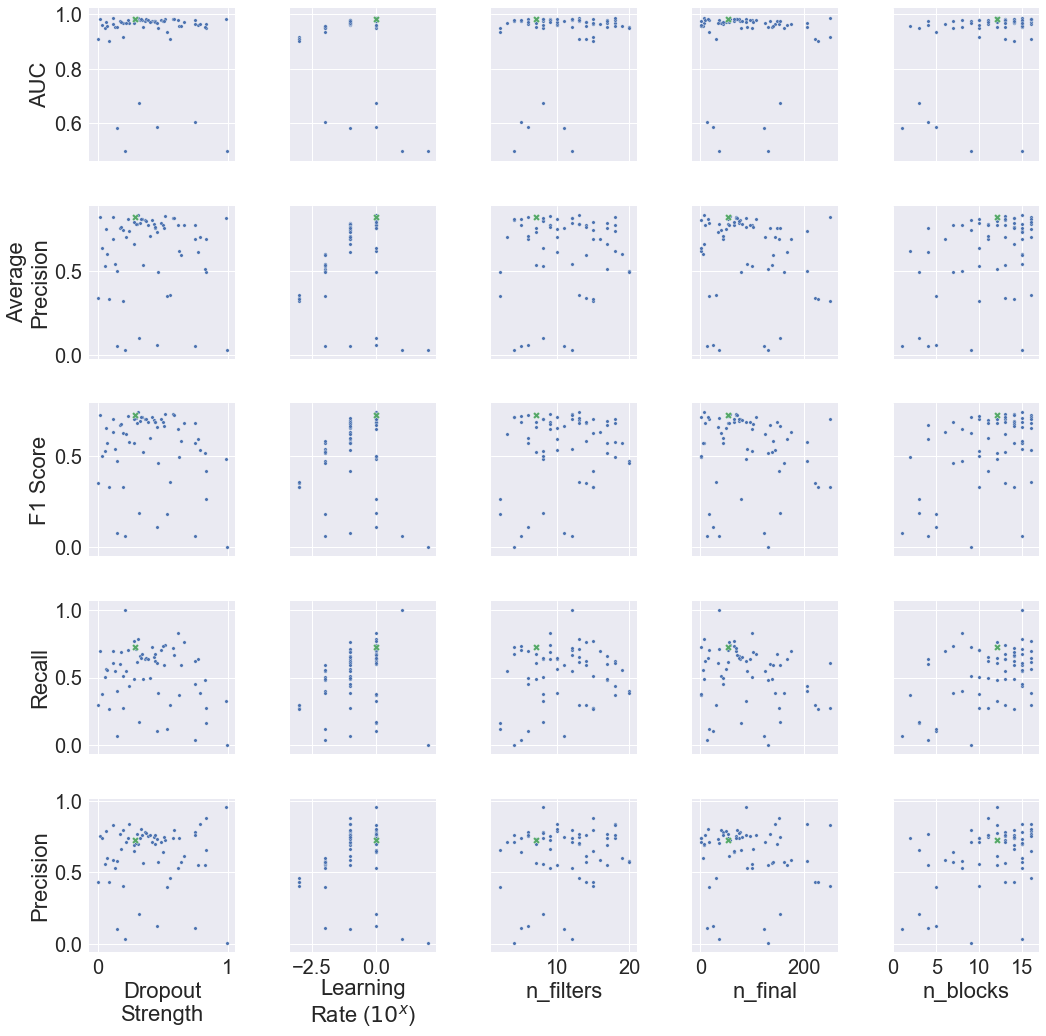

In [4]:
sns.set(style="darkgrid", color_codes=True, font_scale=2)
results = ['auc_score','average_precision_score','f1_score','loss','recall_score','precision_score']
vals = ['batch_size','droput_strength','learning_rate','n_filters','n_final_layer','n_layers']
index = range(len(data.trials))
df = pd.DataFrame(index=index, columns=results+vals)
for item in results:
    df[item] = [data.trials[i]['result'][item] for i in range(len(data.trials))]

for item in vals:
    df[item] = [data.trials[i]['misc']['vals'][item][0] for i in range(len(data.trials))]
print(len(data.trials))
df=df.rename(columns = {'droput_strength':'Dropout\nStrength',
                        'f1_score':'F1 Score', 
                        'n_final_layer':'n_final',
                        'learning_rate': 'Learning\nRate ($10^x$)',
                       'batch_size':'n_batch ($2^x$)',
                       'n_layers':'n_blocks',
                        'auc_score':'AUC',
                       'average_precision_score':'Average\nPrecision',
                       'precision_score':'Precision',
                       'recall_score':'Recall'})

results = ['AUC','Average\nPrecision','F1 Score','loss','Recall','Precision']
vals = ['Dropout\nStrength','Learning\nRate ($10^x$)','n_filters','n_final','n_blocks']
df['e'] = pd.Series(np.zeros(96), index=df.index)
df.at[67,'e'] = 1
results.remove('loss')
df = df.dropna()
df = df[df.loss<75]
g = sns.pairplot(df, size=3, x_vars = vals, y_vars=results, hue='e', markers =['.','X'])
legend= g.fig.get_children()[-1].remove()

# plt.savefig('optimization_pairplot.svg')